In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("cleaned_data.csv")

In [ ]:
df.head()

,age,gender,ethnicity,educationlevel,bmi,smoking,alcoholconsumption,physicalactivity,dietquality,sleepquality,...,functionalassessment,memorycomplaints,behavioralproblems,adl,confusion,disorientation,personalitychanges,difficultycompletingtasks,forgetfulness,diagnosis
0,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,...,6.518877,0,0,1.725883,0,0,0,1,0,0
1,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,...,7.118696,0,0,2.592424,0,0,0,0,1,0
2,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,...,5.895077,0,0,7.119548,0,1,0,1,0,0
3,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,...,8.965106,0,1,6.481226,0,0,0,0,0,0
4,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,...,6.045039,0,0,0.014691,0,0,1,1,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        2149 non-null   int64  
 1   gender                     2149 non-null   int64  
 2   ethnicity                  2149 non-null   int64  
 3   educationlevel             2149 non-null   int64  
 4   bmi                        2149 non-null   float64
 5   smoking                    2149 non-null   int64  
 6   alcoholconsumption         2149 non-null   float64
 7   physicalactivity           2149 non-null   float64
 8   dietquality                2149 non-null   float64
 9   sleepquality               2149 non-null   float64
 10  familyhistoryalzheimers    2149 non-null   int64  
 11  cardiovasculardisease      2149 non-null   int64  
 12  diabetes                   2149 non-null   int64  
 13  depression                 2149 non-null   int64

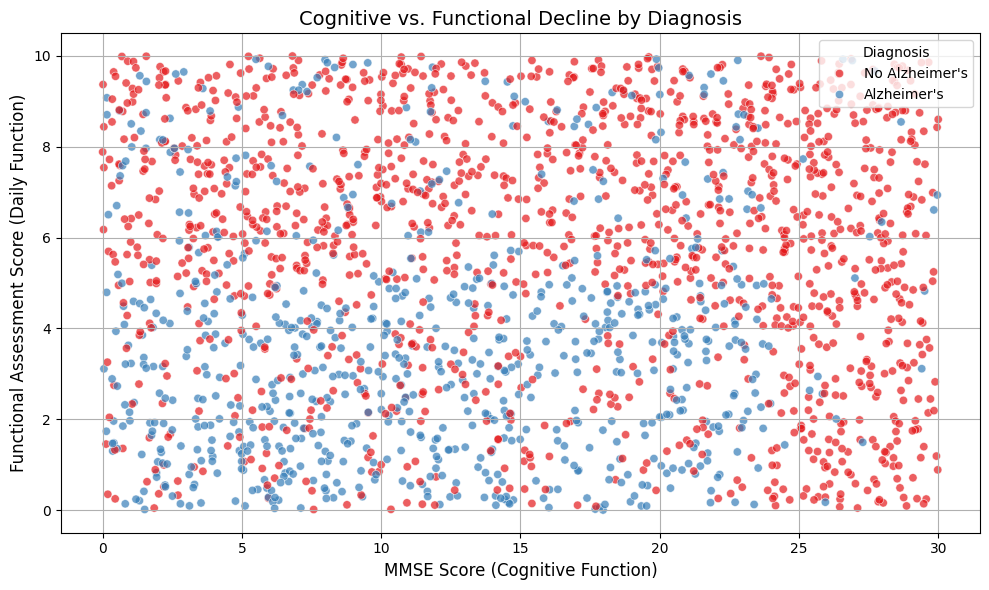

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv('cleaned_data.csv')  # Replace with your dataset path

# Map binary diagnosis to labels
df['diagnosis_label'] = df['diagnosis'].map({
    0: 'No Alzheimer\'s',
    1: 'Alzheimer\'s'
})

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='mmse',
    y='functionalassessment',
    hue='diagnosis_label',
    palette='Set1',
    alpha=0.7,
    edgecolor='w'
)

# Add title and axis labels
plt.title('Cognitive vs. Functional Decline by Diagnosis', fontsize=14)
plt.xlabel('MMSE Score (Cognitive Function)', fontsize=12)
plt.ylabel('Functional Assessment Score (Daily Function)', fontsize=12)
plt.legend(title='Diagnosis')
plt.grid(True)
plt.tight_layout()
plt.show()


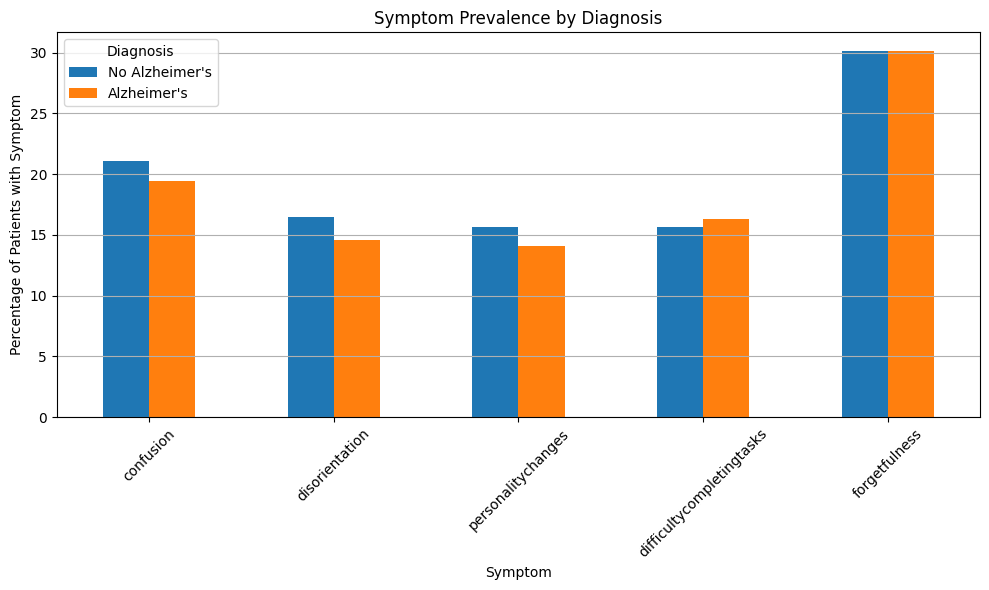

In [ ]:


# List of symptom columns
symptom_cols = [
    'confusion', 'disorientation', 'personalitychanges',
    'difficultycompletingtasks', 'forgetfulness'
]

# Calculate % of patients with each symptom in each diagnosis group
symptom_stats = df.groupby('diagnosis')[symptom_cols].mean().T * 100
symptom_stats.columns = ['No Alzheimer\'s', 'Alzheimer\'s']

# Plot bar chart
symptom_stats.plot(kind='bar', figsize=(10, 6))
plt.title('Symptom Prevalence by Diagnosis')
plt.ylabel('Percentage of Patients with Symptom')
plt.xlabel('Symptom')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.legend(title='Diagnosis')
plt.show()


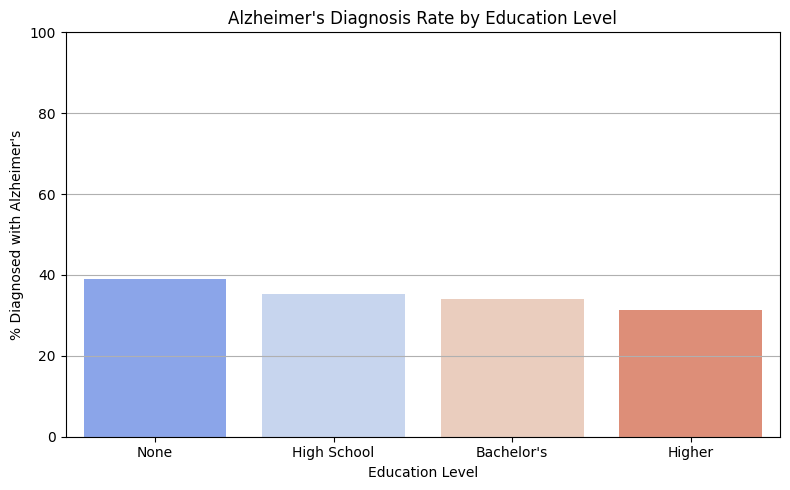

In [ ]:
# Map education levels for readability
education_map = {
    0: 'None',
    1: 'High School',
    2: 'Bachelor\'s',
    3: 'Higher'
}
df['education_label'] = df['educationlevel'].map(education_map)

# Calculate % diagnosed per education level
edu_diagnosis = df.groupby('education_label')['diagnosis'].mean() * 100

# Sort by education level if needed
edu_diagnosis = edu_diagnosis.loc[['None', 'High School', 'Bachelor\'s', 'Higher']]

# Plot bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=edu_diagnosis.index, y=edu_diagnosis.values, palette='coolwarm')
plt.title('Alzheimer\'s Diagnosis Rate by Education Level')
plt.ylabel('% Diagnosed with Alzheimer\'s')
plt.xlabel('Education Level')
plt.ylim(0, 100)
plt.grid(axis='y')
plt.tight_layout()
plt.show()
